In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from plot_util import plot_history

Using TensorFlow backend.


In [2]:
MAX_FEATURES = 10000
MAXLEN = 500
BATCH_SIZE = 32

In [3]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=MAX_FEATURES)
print("raw train_x.shape = {}".format(train_x.shape))
print("raw train_y.shape = {}".format(train_y.shape))

train_x = sequence.pad_sequences(train_x, MAXLEN)
test_x = sequence.pad_sequences(test_x, MAXLEN)
print("padded train_x.shape = {}".format(train_x.shape))
print("padded test_x.shape = {}".format(test_x.shape))

raw train_x.shape = (25000,)
raw train_y.shape = (25000,)
padded train_x.shape = (25000, 500)
padded test_x.shape = (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(MAX_FEATURES, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(
    train_x, train_y, epochs=10, batch_size=32,
    validation_split=0.2,
)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 283s 14ms/step - loss: 0.4176 - acc: 0.8070 - val_loss: 0.3113 - val_acc: 0.8706
Epoch 2/10
20000/20000 [==============================] - 282s 14ms/step - loss: 0.2630 - acc: 0.9000 - val_loss: 0.2944 - val_acc: 0.8764
Epoch 3/10
20000/20000 [==============================] - 281s 14ms/step - loss: 0.2217 - acc: 0.9162 - val_loss: 0.2760 - val_acc: 0.8916
Epoch 4/10
20000/20000 [==============================] - 282s 14ms/step - loss: 0.1960 - acc: 0.9271 - val_loss: 0.3335 - val_acc: 0.8708
Epoch 5/10
20000/20000 [==============================] - 281s 14ms/step - loss: 0.1809 - acc: 0.9337 - val_loss: 0.2811 - val_acc: 0.8924
Epoch 6/10
20000/20000 [==============================] - 281s 14ms/step - loss: 0.1688 - acc: 0.9390 - val_loss: 0.2790 - val_acc: 0.8926
Epoch 7/10
20000/20000 [==============================] - 281s 14ms/s

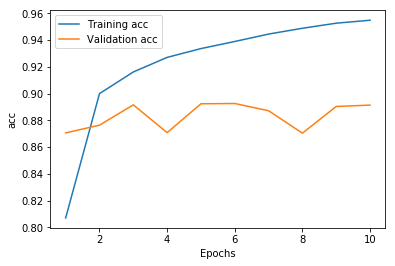

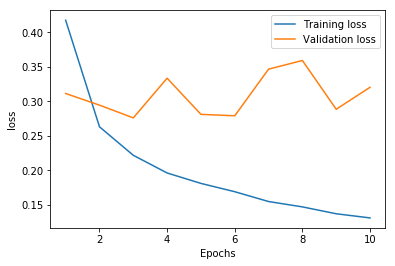

In [7]:
plot_history(history, metrics=('acc', 'loss'))